In [109]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
# read csv file with data
igaba = pd.read_csv("20210617_all_plates.csv")
igaba.head()

,Plate,Well,F0,Fmax,DFF
0,M0021,A01,1722,2981,0.731127
1,M0021,A02,1509,4857,2.218688
2,M0021,A03,2576,5443,1.112966
3,M0021,A04,1954,1707,-0.126407
4,M0021,A05,109,820,6.522936


In [111]:
# add a column that denotes whether data was noisy (1=noisy, 0=good)
# 5/17/21: increased stringency of noise criteria to 2000 raw fluorescence. 
#igaba.loc[(igaba["F0"]>1000)|(igaba["Fmax"]>8999), 'Noisy'] = 0
#igaba.loc[(igaba["F0"]<1000)&(igaba["Fmax"]<9000), 'Noisy'] = 1
igaba.loc[(igaba["F0"]>1000), 'Noisy'] = 0
igaba.loc[(igaba["F0"]<1000), 'Noisy'] = 1
igaba

,Plate,Well,F0,Fmax,DFF,Noisy
0,M0021,A01,1722,2981,0.731127,0.0
1,M0021,A02,1509,4857,2.218688,0.0
2,M0021,A03,2576,5443,1.112966,0.0
3,M0021,A04,1954,1707,-0.126407,0.0
4,M0021,A05,109,820,6.522936,1.0
5,M0021,A06,615,2036,2.310569,1.0
6,M0021,A07,262,1027,2.919847,1.0
7,M0021,A08,1411,2093,0.483345,0.0
8,M0021,A09,695,5042,6.254676,1.0
9,M0021,A10,26,216,7.307692,1.0


In [112]:
# Select control wells
ctrls = igaba[igaba["Well"].isin(["A01","B01","C01"])]
ctrls

,Plate,Well,F0,Fmax,DFF,Noisy
0,M0021,A01,1722,2981,0.731127,0.0
12,M0021,B01,1809,3210,0.774461,0.0
24,M0021,C01,678,1254,0.849558,1.0
96,M0022,A01,2890,4216,0.458824,0.0
108,M0022,B01,3362,4825,0.435158,0.0
120,M0022,C01,2299,3265,0.420183,0.0
192,M0023,A01,3748,5430,0.448773,0.0
204,M0023,B01,3259,4744,0.455661,0.0
216,M0023,C01,2286,3826,0.673666,0.0
288,M0024,A01,254,496,0.952756,1.0


In [113]:
plate1 = igaba[igaba["Plate"]=="M0021"]
plate2 = igaba[igaba["Plate"]=="M0022"]
plate3 = igaba[igaba["Plate"]=="M0023"]
plate4 = igaba[igaba["Plate"]=="M0024"]
plate5 = igaba[igaba["Plate"]=="M0025"]
plate6 = igaba[igaba["Plate"]=="M0026"]
plate7 = igaba[igaba["Plate"]=="M0027"]
plate8 = igaba[igaba["Plate"]=="M0028"]
#plate9 = igaba[igaba["Plate"]=="M0019"]
#plate10 = igaba[igaba["Plate"]=="M0020"]

In [114]:
# find average DFF of control wells in each plate
plate1_ctrls = ctrls[ctrls["Plate"]=="M0021"]
plate1_ctrl_dff = plate1_ctrls["DFF"].mean()

plate2_ctrls = ctrls[ctrls["Plate"]=="M0022"]
plate2_ctrl_dff = plate2_ctrls["DFF"].mean()

plate3_ctrls = ctrls[ctrls["Plate"]=="M0023"]
plate3_ctrl_dff = plate3_ctrls["DFF"].mean()

plate4_ctrls = ctrls[ctrls["Plate"]=="M0024"]
plate4_ctrl_dff = plate4_ctrls["DFF"].mean()

plate5_ctrls = ctrls[ctrls["Plate"]=="M0025"]
plate5_ctrl_dff = plate5_ctrls["DFF"].mean()

plate6_ctrls = ctrls[ctrls["Plate"]=="M0026"]
plate6_ctrl_dff = plate6_ctrls["DFF"].mean()

plate7_ctrls = ctrls[ctrls["Plate"]=="M0027"]
plate7_ctrl_dff = plate7_ctrls["DFF"].mean()

plate8_ctrls = ctrls[ctrls["Plate"]=="M0028"]
plate8_ctrl_dff= plate8_ctrls["DFF"].mean()

#plate9_ctrls = ctrls[ctrls["Plate"]=="M0019"]
#plate9_ctrl_dff = plate9_ctrls["DFF"].mean()

#plate10_ctrls = ctrls[ctrls["Plate"]=="M0020"]
#plate10_ctrl_dff = plate10_ctrls["DFF"].mean()

In [115]:
# make a list of all values that pass the noise test.
allPlates_goodF = igaba[igaba["Noisy"]==0]
allPlates_goodF

,Plate,Well,F0,Fmax,DFF,Noisy
0,M0021,A01,1722,2981,0.731127,0.0
1,M0021,A02,1509,4857,2.218688,0.0
2,M0021,A03,2576,5443,1.112966,0.0
3,M0021,A04,1954,1707,-0.126407,0.0
7,M0021,A08,1411,2093,0.483345,0.0
10,M0021,A11,1322,4396,2.325265,0.0
11,M0021,A12,1043,2496,1.393097,0.0
12,M0021,B01,1809,3210,0.774461,0.0
17,M0021,B06,1234,2341,0.897083,0.0
19,M0021,B08,1214,1890,0.556837,0.0


In [116]:
# sort good data by descending DFF
# pick out the top 20 highest DFF wells
allPlates_goodF_sorted = allPlates_goodF.sort_values(by=["DFF"],ascending=False)
tophits = allPlates_goodF_sorted.head(20)

# filter out DFF values less than 2
tophits = tophits[tophits["DFF"]>=2]
print('*** Top hits sorted by DFF ***')
tophits

*** Top hits sorted by DFF ***


,Plate,Well,F0,Fmax,DFF,Noisy
570,M0026,H07,1150,11911,9.357391,0.0
653,M0027,G06,1620,16195,8.996914,0.0
491,M0026,A12,1138,10322,8.070299,0.0
373,M0024,H02,1364,12125,7.889296,0.0
724,M0028,E05,1271,10009,6.874902,0.0
659,M0027,G12,1210,9447,6.807438,0.0
382,M0024,H11,1044,8057,6.717433,0.0
733,M0028,F02,1307,10059,6.696251,0.0
622,M0027,D11,1006,7701,6.655070,0.0
744,M0028,G01,1474,11174,6.580733,0.0


In [117]:
# sort the hit list by plate number
tophits_sorted = tophits.sort_values(by=["Plate"])
print('*** Top hits sorted by Plate ***')
tophits_sorted

*** Top hits sorted by Plate ***


,Plate,Well,F0,Fmax,DFF,Noisy
373,M0024,H02,1364,12125,7.889296,0.0
382,M0024,H11,1044,8057,6.717433,0.0
385,M0025,A02,1562,11085,6.096671,0.0
570,M0026,H07,1150,11911,9.357391,0.0
491,M0026,A12,1138,10322,8.070299,0.0
522,M0026,D07,1048,7835,6.476145,0.0
555,M0026,G04,1148,8556,6.452962,0.0
567,M0026,H04,1977,14337,6.251897,0.0
653,M0027,G06,1620,16195,8.996914,0.0
659,M0027,G12,1210,9447,6.807438,0.0


In [118]:
# GRAPHS
# Make a list of 96 wells for x-axis (0-95)
numwells = igaba.shape
wellidx = list(range(96))

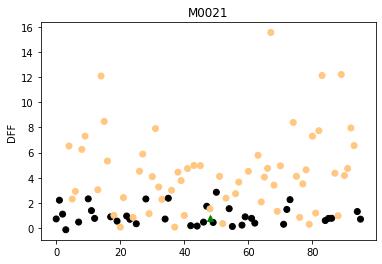

In [119]:
#All plates: black dots have good F values, orange dots are "Noisy",
#and the green triangle shows the average DFF of the control wells.

#Plate 1
plt.scatter(wellidx,plate1["DFF"],c=plate1["Noisy"],cmap='copper')
plt.plot(48,plate1_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0021')
plt.savefig('M0021.png')

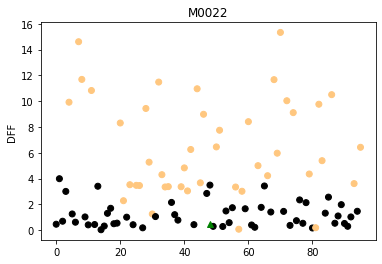

In [120]:
#Plate 2
plt.scatter(wellidx,plate2["DFF"],c=plate2["Noisy"],cmap="copper")
plt.plot(48,plate2_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0022')
plt.savefig('M0022.png')

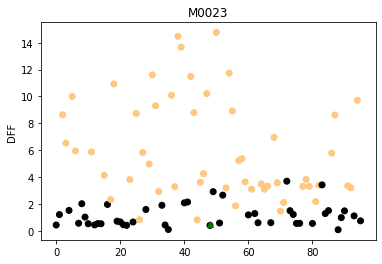

In [121]:
#Plate 3
plt.scatter(wellidx,plate3["DFF"],c=plate3["Noisy"],cmap="copper")
plt.plot(48,plate3_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0023')
plt.savefig('M0023.png')

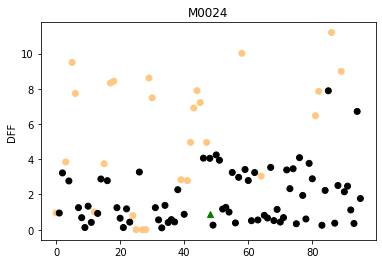

In [122]:
#Plate 4
plt.scatter(wellidx,plate4["DFF"],c=plate4["Noisy"],cmap="copper")
plt.plot(48,plate4_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0024')
plt.savefig('M0024.png')

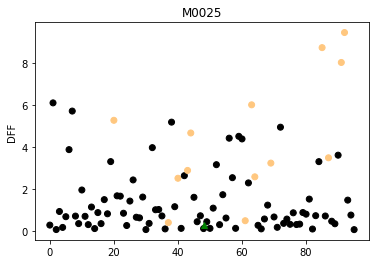

In [123]:
#Plate 5
plt.scatter(wellidx,plate5["DFF"],c=plate5["Noisy"],cmap="copper")
plt.plot(48,plate5_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0025')
plt.savefig('M0025.png')

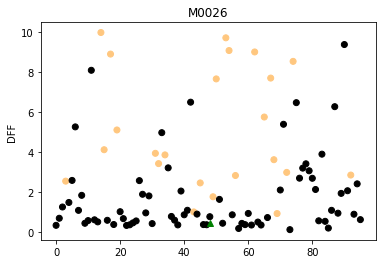

In [124]:
#Plate 6
plt.scatter(wellidx,plate6["DFF"],c=plate6["Noisy"],cmap="copper")
plt.plot(48,plate6_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0026')
plt.savefig('M0026.png')

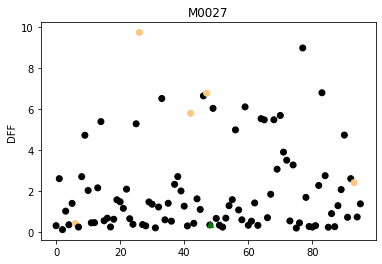

In [125]:
#Plate 7
plt.scatter(wellidx,plate7["DFF"],c=plate7["Noisy"],cmap="copper")
plt.plot(48,plate7_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0027')
plt.savefig('M0027.png')

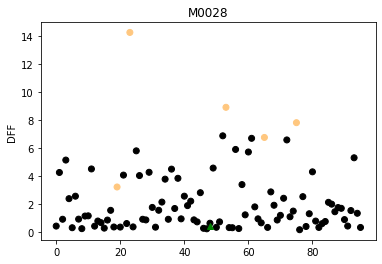

In [126]:
#Plate 8
plt.scatter(wellidx,plate8["DFF"],c=plate8["Noisy"],cmap="copper")
plt.plot(48,plate8_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0028')
plt.savefig('M0028.png')